🌲 Random Forest Accuracy: 0.821

🔹 Confusion Matrix:


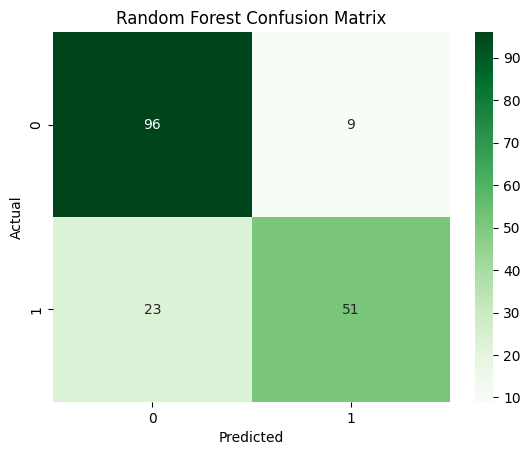


🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [1]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load data
df = pd.read_csv("C:/ML/data/train.csv")

# Step 3: Handle missing values
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna("Unknown")

# Step 4: Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Step 5: Split data
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,      # number of trees
    max_depth=5,           # limit tree depth to prevent overfitting
    random_state=42
)
rf_model.fit(X_train, y_train)

# Step 7: Predictions
y_pred_rf = rf_model.predict(X_test)

# Step 8: Evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
print("🌲 Random Forest Accuracy:", round(acc_rf, 3))

print("\n🔹 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_rf))


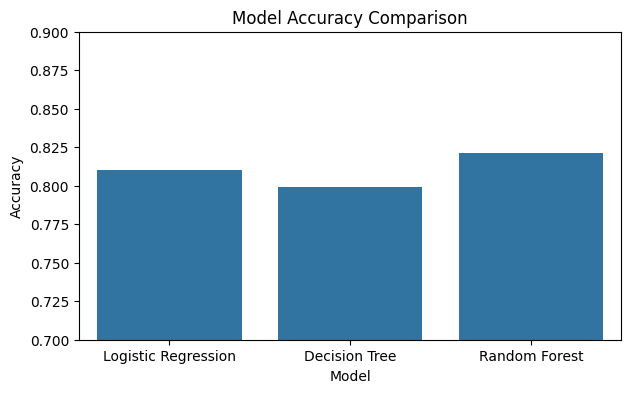

                 Model  Accuracy
0  Logistic Regression  0.810000
1        Decision Tree  0.799000
2        Random Forest  0.821229


In [2]:
# Model Comparison
acc_log = 0.81       # Logistic Regression accuracy (from earlier)
acc_tree = 0.799     # Decision Tree accuracy
acc_rf = acc_rf      # Random Forest accuracy from your last output

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [acc_log, acc_tree, acc_rf]
})

plt.figure(figsize=(7,4))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Accuracy Comparison')
plt.ylim(0.7, 0.9)
plt.show()

print(results)


In [3]:
import joblib
joblib.dump(rf_model, "C:/ML/models/random_forest_model.joblib")
print("✅ Random Forest model saved successfully!")


✅ Random Forest model saved successfully!
